# CrazyAra

## Data Analysis of the Training Data

* file: analyze_train_data.ipynb
* brief: Filterts out the used games of lichess crazyhouse dataset and does some analysis on it.

* author: QueensGambit
* contact: johannes.czech@stud.tu-darmstadt.de
* version: 2018-11-28 initial version


In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
%reload_ext autoreload

In [23]:
import sys, os
sys.path.insert(0,'../../../')
import os
import sys
#from DeepCrazyhouse.src.preprocessing.PGN2PlanesConverter import PGN2PlanesConverter
from DeepCrazyhouse.src.runtime.color_logger import enable_color_logging
from DeepCrazyhouse.src.preprocessing.dataset_loader import load_pgn_dataset
import logging
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import chess.pgn
import pandas as pd
import numpy as np

In [25]:
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-colorblind')
#enable_color_logging()

## Settings
_same as_ `convert_pgn_to_planes.ipynb`

In [5]:
min_elo_both = 2000
nb_games_per_file = 1000

In [6]:
s_idcs, x, yv, yp, pgn_dataset = load_pgn_dataset()

Exception: There aren't enough parts available in the given directory for partid=0

In [ ]:
pgn_dataset.tree()

In [ ]:
converter = PGN2PlanesConverter(limit_nb_games_to_analyze=0, nb_games_per_file=nb_games_per_file,
                  max_nb_files=0, min_elo_both=min_elo_both, termination_conditions=["Normal"], log_lvl=logging.DEBUG,
                  compression='lz4', clevel=5, dataset_type='train')

In [ ]:
lst_all_pgn_sel, lst_nb_games_sel, lst_batch_white_won, lst_batch_black_won, lst_batch_draw = converter.filter_all_pgns()

In [ ]:
sum(lst_nb_games_sel)

In [ ]:
file = open('crazyara_lichess_dataset.pgn', mode='w')

In [ ]:
for pgn_sel in lst_all_pgn_sel:
    for pgn in pgn_sel:
        file.writelines(pgn.readlines())

In [ ]:
file.close()

In [ ]:
pgn = open('crazyara_lichess_dataset.pgn')


In [ ]:
columns=['Event','Site','Date','Round','White','Black','Result', 'WhiteElo', 'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff', 'Termination', 'TimeControl', 'UTCDate', 'UTCTime', 'Variant']

In [ ]:
nb_games

In [ ]:
len(lst_all_pgn_sel[0])

In [ ]:
len(df)

## Fill the pandas dataframe

In [ ]:
# this list contains the full data of the pandas table
data = []

# read the first game
game = chess.pgn.read_game(pgn)


# read in all games one by one
for offset, headers in chess.pgn.scan_headers(pgn):
#while game is not None:
    row = []
    # iterate over all collumns
    for colname in columns:
        # fill one row of data
        try:
            row.append(headers[colname])
        except KeyError:
            # add empty value if entry is missing
            row.append([])
            print(headers)
    # add the row to the full table content
    data.append(row)
    # read in the next game
    #game = chess.pgn.read_game_h(pgn)
                

In [ ]:
pgn.close()

In [ ]:
df = pd.DataFrame(data, columns=columns)

## Export the dataframe

In [ ]:
df.to_csv('crazyara_lichess_dataset_stats.csv')

### Load the dataframe

In [5]:
file_path = '/media/queensgambit/2037-A8A6/etc/CrazyAraStuff/data/crazyara_lichess_dataset_stats.csv' # 'crazyara_lichess_dataset_stats.csv'
df = pd.DataFrame.from_csv(file_path)

/home/queensgambit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  
/home/queensgambit/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [6]:
df_full = pd.concat([df['White'], df['Black']])

In [7]:
((df_full.value_counts()[:10] / len(df)) * 100).round(2)

mathace                4.52
ciw                    3.68
retardedplatypus123    3.45
xuanet                 3.38
dovijanic              3.14
KyleLegion             2.67
JannLee                2.52
crosky                 2.51
mariorton              2.36
opperwezen             2.27
dtype: float64

In [8]:
elo = np.concatenate((df['WhiteElo'].values, df['BlackElo'].values))

In [9]:
elo.astype(np.float)

array([2537., 2095., 2542., ..., 2046., 2010., 2219.])

In [10]:
len(elo[-5000:])

5000

In [11]:
export_plots = False

In [12]:
sns_cmap = sns.color_palette(palette='colorblind')

In [13]:
# https://matplotlib.org/gallery/statistics/barchart_demo.html#sphx-glr-gallery-statistics-barchart-demo-py
def attach_ordinal(num):
    """helper function to add ordinal string to integers

    1 -> 1st
    56 -> 56th
    """
    suffixes = {str(i): v
                for i, v in enumerate(['th', 'st', 'nd', 'rd', 'th',
                                       'th', 'th', 'th', 'th', 'th'])}

    v = str(num)
    # special case early teens
    if v in {'11', '12', '13'}:
        return v + 'th'
    return v + suffixes[v[-1]]


2019-05-19 21:18:35 matplotlib.axes._base[5754] DEBUG update_title_pos
2019-05-19 21:18:35 matplotlib.font_manager[5754] DEBUG findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to Liberation Sans ('/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf') with score of 2.050000.
2019-05-19 21:18:35 matplotlib.font_manager[5754] DEBUG findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to Liberation Sans ('/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf') with score of 2.050000.
2019-05-19 21:18:35 matplotlib.axes._base[5754] DEBUG update_title_pos
2019-05-19 21:18:35 matplotlib.axes._base[5754] DEBUG update_title_pos
2019-05-19 21:18:35 matplotlib.axes._base[5754] DEBUG update_title_pos
2019-05-19 21:18:35 matplotlib.font_manager[5754] DEBUG findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=20.0 to Liberati

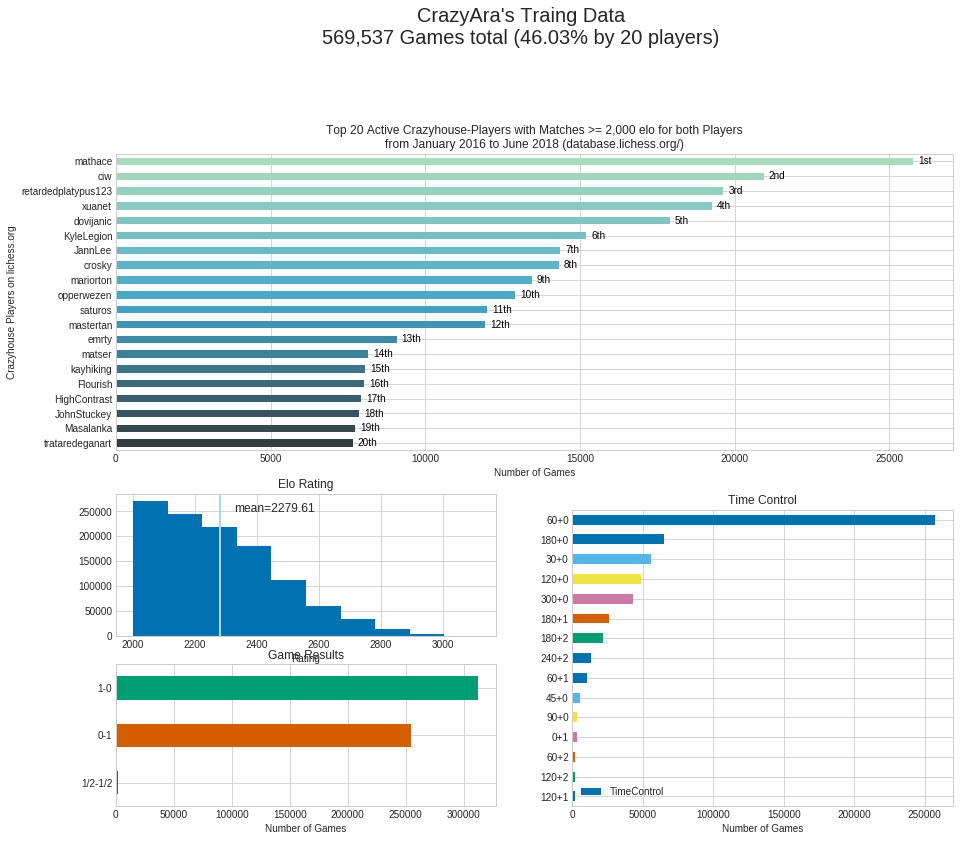

In [14]:
def example_plot(ax, fontsize=12):
    ax.plot([1, 2])
    ax.locator_params(nbins=3)
    ax.set_xlabel('x-label', fontsize=fontsize)
    ax.set_ylabel('y-label', fontsize=fontsize)
    ax.set_title('Title', fontsize=fontsize)
        
plt.close('all')
fig = plt.figure(figsize=(10*1.5,8*1.5))

ax1 = plt.subplot(211)
ax2 = plt.subplot(425)
ax3 = plt.subplot(224)
ax4 = plt.subplot(427)

top_x = 20
cum_perc = df_full.value_counts()[:top_x].sum() / len(df) * 100

plt.suptitle("CrazyAra's Traing Data\n569,537 Games total (%.2f" % cum_perc + "% " + "by %d players)" % top_x, y=1.05, size=20)

#ax = (df_full.value_counts()[:20][::-1] / len(df) * 100).plot('barh', title="CrazyAra's Traing Data")
ax = (df_full.value_counts()[:top_x][::-1]).plot('barh', color=sns.color_palette("GnBu_d", top_x), #color=sns_cmap[0],
                                                 title="\nTop %d Active Crazyhouse-Players with Matches >= 2,000 elo for both Players\nfrom January 2016 to June 2018 (database.lichess.org/)" % top_x, ax=ax1)
#rects = ax1.barh(range(top_x), df_full.value_counts()[:top_x][::-1],
#                color=sns.cubehelix_palette(top_x, start=.5, rot=-.75)[::-1],)
#y_labels = list(df_full[:top_x]) #[::-1])
#ax1.set_yticklabels(y_labels)
                # title="\nTop %d Active Crazyhouse-Players with Matches >= 2,000 elo for both Players\nfrom January 2016 to June 2018 (database.lichess.org/)" % top_x)
ax.set_xlabel("Number of Games")
#ax1.set_title('\nTop %d Active Crazyhouse-Players with Matches >= 2,000 elo for both Players\nfrom January 2016 to June 2018 (database.lichess.org/)" % top_x)')
rect_labels = []
# Lastly, write in the ranking inside each bar to aid in interpretation
for i, rect in enumerate(ax.patches):
    # Rectangle widths are already integer-valued but are floating
    # type, so it helps to remove the trailing decimal point and 0 by
    # converting width to int type
    width = int(rect.get_width())

    rankStr = attach_ordinal(top_x-i)
    # The bars aren't wide enough to print the ranking inside
    if True: #width < 40:
        # Shift the text to the right side of the right edge
        xloc = 5
        # Black against white background
        clr = 'black'
        align = 'left'
    else:
        # Shift the text to the left side of the right edge
        xloc = -5
        # White on magenta
        clr = 'white'
        align = 'right'

    # Center the text vertically in the bar
    yloc = rect.get_y() + rect.get_height() / 2
    label = ax1.annotate(rankStr, xy=(width, yloc), xytext=(xloc, 0),
                        textcoords="offset points",
                        ha=align, va='center',
                        color=clr, clip_on=True) #, weight='bold')
    rect_labels.append(label)
    
ax.set_ylabel("Crazyhouse Players on lichess.org")

ax2.hist(elo[-5000000:]) #, bins=15)
ax2.axvline(x=elo.mean(), linewidth=2, color='lightblue')
ax2.text(elo.mean() + elo.mean()*.02,5000000 / 20, "mean=%.2f" % elo.mean(), fontsize=12)
ax2.set_title("Elo Rating")
ax2.set_xlabel("Rating")

#example_plot(ax1)
#example_plot(ax2)
#example_plot(ax3)

labels = ['Bullet', 'Blitz', 'Bullet', 'Bullet', 'Blitz', 'Blitz', 'Blitz', 'Blitz', 'Bullet', 'Bullet', 'Bullet', 'Bullet', 'Bullet', 'Blitz', 'Bullet']
df['TimeControl'].value_counts()[:15][::-1].plot('barh', title='Time Control', ax=ax3) #, label=labels[0])
#rects = ax3.barh(y=range(15), width=df['TimeControl'].value_counts()[:15]) #, label=labels)
#for rect, label in zip(rects, labels):
    #rect.label = label

        
ax3.set_xlabel("Number of Games")
ax3.legend()

df['Result'].value_counts()[::-1].plot('barh', ax=ax4, color=[sns_cmap[0], sns_cmap[2], sns_cmap[1]])
ax4.set_title('Game Results')
ax4.set_xlabel("Number of Games")

#plt.tight_layout()

if export_plots:
    plt.savefig("plots/crazyara_training_data.png", bbox_inches='tight')
    plt.savefig("plots/crazyara_training_data.pdf", bbox_inches='tight')

In [16]:
import matplotlib2tikz

In [14]:
export_plots = True

In [27]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

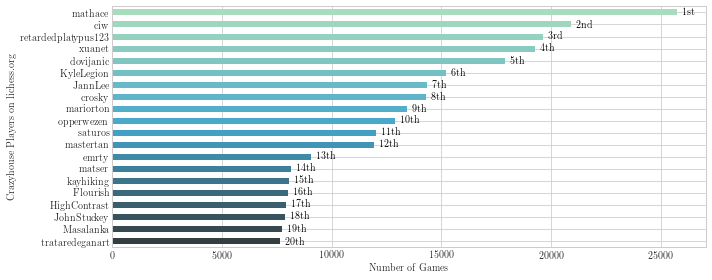

In [24]:
top_x = 20
fig = plt.figure(figsize=(10,4))
ax = (df_full.value_counts()[:top_x][::-1]).plot('barh', color=sns.color_palette("GnBu_d", top_x)) #color=sns_cmap[0],
                                                 #title="\nTop %d Active Crazyhouse-Players with Matches >= 2,000 elo for both Players\nfrom January 2016 to June 2018 (database.lichess.org/)" % top_x)
#rects = ax1.barh(range(top_x), df_full.value_counts()[:top_x][::-1],
#                color=sns.cubehelix_palette(top_x, start=.5, rot=-.75)[::-1],)
#y_labels = list(df_full[:top_x]) #[::-1])
#ax1.set_yticklabels(y_labels)
                # title="\nTop %d Active Crazyhouse-Players with Matches >= 2,000 elo for both Players\nfrom January 2016 to June 2018 (database.lichess.org/)" % top_x)
ax.set_xlabel("Number of Games")
#ax1.set_title('\nTop %d Active Crazyhouse-Players with Matches >= 2,000 elo for both Players\nfrom January 2016 to June 2018 (database.lichess.org/)" % top_x)')
rect_labels = []
# Lastly, write in the ranking inside each bar to aid in interpretation
for i, rect in enumerate(ax.patches):
    # Rectangle widths are already integer-valued but are floating
    # type, so it helps to remove the trailing decimal point and 0 by
    # converting width to int type
    width = int(rect.get_width())

    rankStr = attach_ordinal(top_x-i)
    # The bars aren't wide enough to print the ranking inside
    if True: #width < 40:
        # Shift the text to the right side of the right edge
        xloc = 5
        # Black against white background
        clr = 'black'
        align = 'left'
    else:
        # Shift the text to the left side of the right edge
        xloc = -5
        # White on magenta
        clr = 'white'
        align = 'right'

    # Center the text vertically in the bar
    yloc = rect.get_y() + rect.get_height() / 2
    label = ax.annotate(rankStr, xy=(width, yloc), xytext=(xloc, 0),
                        textcoords="offset points",
                        ha=align, va='center',
                        color=clr, clip_on=True) #, weight='bold')
    rect_labels.append(label)
    
ax.set_ylabel("Crazyhouse Players on lichess.org")
plt.tight_layout()

if export_plots:
    plt.savefig("plots/top_active_cz_players.png", bbox_inches='tight')
    plt.savefig("plots/top_active_cz_players.pdf", bbox_inches='tight')
#matplotlib2tikz.save("plots/tikz/top_active_cz_players.tex")

In [16]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

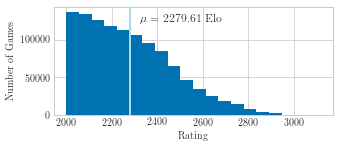

In [29]:
fig = plt.figure(figsize=(10/2,4/2))
plt.hist(elo[-5000000:], bins=20)
plt.axvline(x=elo.mean(), linewidth=2, color='lightblue')
plt.text(elo.mean() + elo.mean()*.02,2500000 / 20, r"$\mu=%.2f$ Elo" % elo.mean(), fontsize=12)
#plt.title("Elo Rating")
plt.xlabel(r"Rating")
plt.ylabel(r"Number of Games")
if export_plots:
    plt.savefig("plots/elo_rating.png", bbox_inches='tight')
    plt.savefig("plots/elo_rating.pdf", bbox_inches='tight')

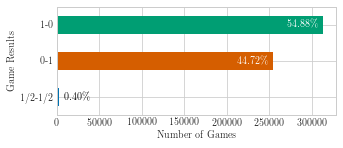

In [52]:
fig = plt.figure(figsize=(10/2,4/2))
ax = df['Result'].value_counts()[::-1].plot('barh', color=[sns_cmap[0], sns_cmap[2], sns_cmap[1]])
# Lastly, write in the ranking inside each bar to aid in interpretation
for i, rect in enumerate(ax.patches):
    # Rectangle widths are already integer-valued but are floating
    # type, so it helps to remove the trailing decimal point and 0 by
    # converting width to int type
    width = int(rect.get_width())
    rankStr = "%.2f" % (width/len(df)*100) + '\%' #attach_ordinal(top_x-i)
    # The bars aren't wide enough to print the ranking inside
    if width < 5000:
        # Shift the text to the right side of the right edge
        xloc = 5
        # Black against white background
        clr = 'black'
        align = 'left'
    else:
        # Shift the text to the left side of the right edge
        xloc = -5
        # White on magenta
        clr = 'white'
        align = 'right'

    # Center the text vertically in the bar
    yloc = rect.get_y() + rect.get_height() / 2
    label = ax.annotate(rankStr, xy=(width, yloc), xytext=(xloc, 0),
                        textcoords="offset points",
                        ha=align, va='center',
                        color=clr, clip_on=True) #, weight='bold')
    rect_labels.append(label)
#plt.title('Game Results')
plt.xlabel("Number of Games")
plt.ylabel("Game Results")
if export_plots:
    plt.savefig("plots/game_result.png", bbox_inches='tight')
    plt.savefig("plots/game_result.pdf", bbox_inches='tight')

121571  games total
White-Black-Draw: 80303-38796-2472
White-Black-Draw: 66.05% 31.91% 2.03%

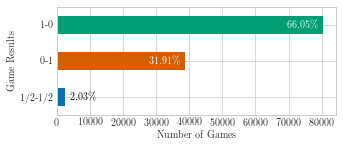

In [70]:
sf_games = np.array([2472, 38796, 80303])
fig = plt.figure(figsize=(10/2,4/2))
rects = plt.barh(range(3), sf_games, height=0.5, color=[sns_cmap[0], sns_cmap[2], sns_cmap[1]])
ax = plt.gca()
plt.yticks(range(3), ['1/2-1/2', '0-1', '1-0'])
for i, rect in enumerate(rects):
    # Rectangle widths are already integer-valued but are floating
    # type, so it helps to remove the trailing decimal point and 0 by
    # converting width to int type
    width = int(rect.get_width())
    rankStr = "%.2f" % (width/sf_games.sum()*100) + '\%' #attach_ordinal(top_x-i)
    # The bars aren't wide enough to print the ranking inside
    if width < 5000:
        # Shift the text to the right side of the right edge
        xloc = 5
        # Black against white background
        clr = 'black'
        align = 'left'
    else:
        # Shift the text to the left side of the right edge
        xloc = -5
        # White on magenta
        clr = 'white'
        align = 'right'

    # Center the text vertically in the bar
    yloc = rect.get_y() + rect.get_height() / 2 - 0.015
    label = ax.annotate(rankStr, xy=(width, yloc), xytext=(xloc, 0),
                        textcoords="offset points",
                        ha=align, va='center',
                        color=clr, clip_on=True) #, weight='bold')
plt.xlabel("Number of Games")
plt.ylabel("Game Results")
plt.ylim([-0.5,2.5])
if export_plots:
    plt.savefig("plots/sf_game_result.png", bbox_inches='tight')
    plt.savefig("plots/sf_game_result.pdf", bbox_inches='tight')

In [64]:
df_tc['TimeControl'] = df['TimeControl'].value_counts()[:15][::-1]

In [68]:
df_tc['TC_Type'] = labels #pd.Series(labels)

In [63]:
df_tc = pd.DataFrame()

In [69]:
df_tc

,TimeControl,TC_Type
120+1,1747,Bullet
120+2,1873,Blitz
60+2,2065,Bullet
0+1,3056,Bullet
90+0,3102,Blitz
45+0,5468,Blitz
60+1,10731,Blitz
240+2,13208,Blitz
180+2,21478,Bullet
180+1,25772,Bullet


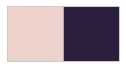

In [79]:
sns.color_palette(palette='colorblind')
sns.palplot(sns.cubehelix_palette(2))

In [17]:
mapping = {'Bullet': sns_cmap[0],
           'Blitz': sns_cmap[1]}

In [18]:
labels_color = []
for label in labels:
    labels_color.append(mapping[label])

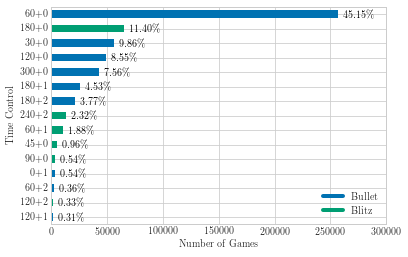

In [36]:
labels = ['Bullet', 'Blitz', 'Bullet', 'Bullet', 'Blitz', 'Blitz', 'Blitz', 'Blitz', 'Bullet', 'Bullet', 'Bullet', 'Bullet', 'Bullet', 'Blitz', 'Bullet']
#ax = df_tc.plot.barh(title='Time Control', color=labels_color)
ax = df['TimeControl'].value_counts()[:15][::-1].plot('barh', color=labels_color) #, label=labels[0])
for i, rect in enumerate(ax.patches):
    # Rectangle widths are already integer-valued but are floating
    # type, so it helps to remove the trailing decimal point and 0 by
    # converting width to int type
    width = int(rect.get_width())
    rankStr = "%.2f" % (width/len(df)*100) + '\%' #attach_ordinal(top_x-i)
    # The bars aren't wide enough to print the ranking inside
    if True: #width < 100000:
        # Shift the text to the right side of the right edge
        xloc = 5
        # Black against white background
        clr = 'black'
        align = 'left'
    else:
        # Shift the text to the left side of the right edge
        xloc = -5
        # White on magenta
        clr = 'white'
        align = 'right'

    # Center the text vertically in the bar
    yloc = rect.get_y() + rect.get_height() / 2 - 0.1
    label = ax.annotate(rankStr, xy=(width, yloc), xytext=(xloc, 0),
                        textcoords="offset points",
                        ha=align, va='center',
                        color=clr, clip_on=True) #, weight='bold')
    #rect_labels.append(label)
plt.ylabel('Time Control')
plt.xlabel('Number of Games')
plt.legend()
plt.xlim([0,300000])
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=sns_cmap[0], lw=4),
                Line2D([0], [0], color=sns_cmap[1], lw=4),
               ]
ax.legend(custom_lines, ['Bullet', 'Blitz'], loc='lower right')
if export_plots:
    plt.savefig("plots/time_contol.png", bbox_inches='tight')
    plt.savefig("plots/time_contol.pdf", bbox_inches='tight')

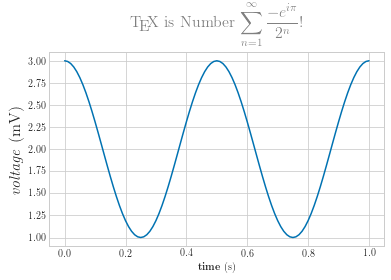

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Example data
t = np.arange(0.0, 1.0 + 0.01, 0.01)
s = np.cos(4 * np.pi * t) + 2

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t, s)

plt.xlabel(r'\textbf{time} (s)')
plt.ylabel(r'\textit{voltage} (mV)',fontsize=16)
plt.title(r"\TeX\ is Number "
          r"$\displaystyle\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}$!",
          fontsize=16, color='gray')
# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)

plt.savefig('tex_demo')
plt.show()

In [ ]:
np.array(df['WhiteElo'].values, np.int).mean()

In [ ]:
np.array(df['WhiteElo'].values, np.int).std()

In [ ]:
df